In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
!pip install kaggle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay
import random

df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

print(df.shape)
print(df.head(5))

FileNotFoundError: [Errno 2] No such file or directory: '/content/PS_20174392719_1491204439457_log.csv'

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing Values:\n", missing_values)

df = df.dropna()

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


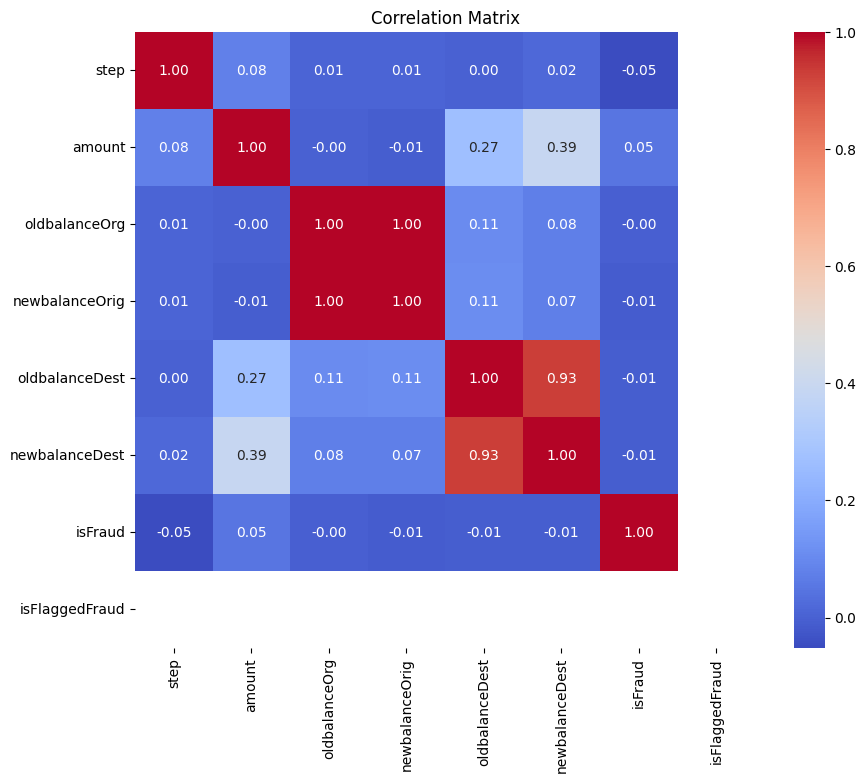

In [ ]:
# Remove rows with missing values

# Create a correlation matrix
correlation_matrix = df.corr(numeric_only=True)  # To calculate correlation only for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Feature selection and splitting
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Exclude non-numeric columns from the training and testing data
non_numeric_columns = ['nameOrig', 'nameDest', 'type']
X_train = X_train.drop(columns=non_numeric_columns)
X_test = X_test.drop(columns=non_numeric_columns)


In [ ]:

# Create an XGBoost classifier
model = xgb.XGBClassifier()

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9991411394217006


In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13953
         1.0       1.00      0.37      0.54        19

    accuracy                           1.00     13972
   macro avg       1.00      0.68      0.77     13972
weighted avg       1.00      1.00      1.00     13972



In [ ]:

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)


Text(0.5, 1.0, 'Confusion Matrix')

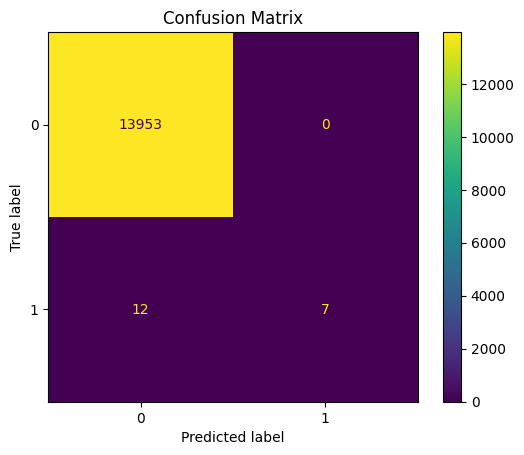

In [ ]:
# Plot the confusion matrix
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')

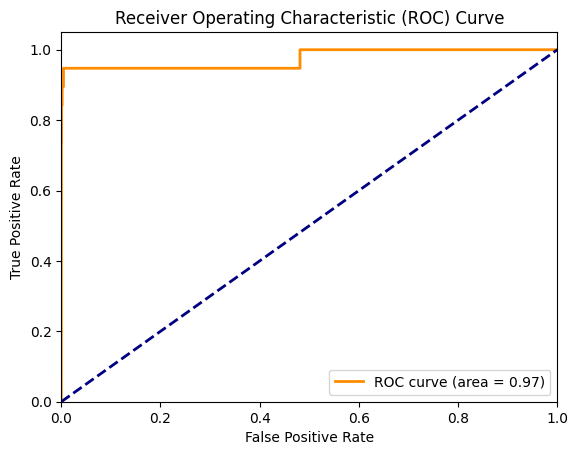

In [ ]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Collect user input
user_input = {
    'step': 1,
    'amount': 10000.00,
    'oldbalanceOrg': 30000.00,
    'newbalanceOrig': 0.0,
    'oldbalanceDest': 3000.00,
    'newbalanceDest': 33000.00,
    'isFlaggedFraud': df['isFlaggedFraud'].values[0]  # Extract from your dataset
}

In [ ]:
# Create a DataFrame from user input
user_df = pd.DataFrame([user_input])

In [ ]:
# Make predictions using the model
user_predictions = model.predict(user_df)

In [ ]:
# Check if the user input resulted in fraud or not
if user_predictions[0] == 1:
    print("The transaction is predicted as fraud.")
else:
    print("The transaction is predicted as non-fraud.")

from sklearn.metrics import precision_recall_curve, average_precision_score


The transaction is predicted as fraud.


In [ ]:
# Calculate Precision and Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)


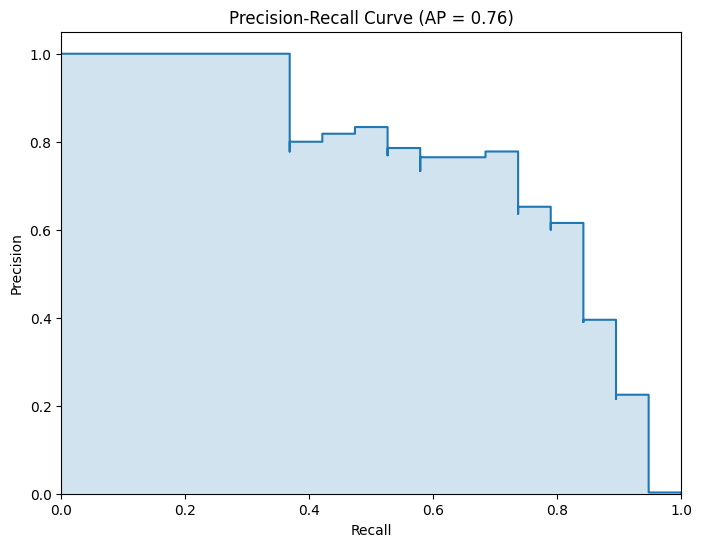

In [ ]:
# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.show()

In [ ]:
import pandas as pd

# Assuming df is your DataFrame, either defined or imported from your data source
# For demonstration purposes, let's create a sample DataFrame with 'Class' column
data = {'Class': [0, 1, 0, 0, 1, 0, 1, 0, 0, 1]}
df = pd.DataFrame(data)

# The function "len" counts the number of classes = 1 and saves it as an object "fraud_records"
fraud_records = len(df[df.Class == 1])

# Defines the index for fraud and non-fraud in the lines:
fraud_indices = df[df.Class == 1].index
non_fraud_indices = df[df.Class == 0].index

# Example output
print("Number of fraud records:", fraud_records)
print("Indices of fraud records:", fraud_indices)
print("Indices of non-fraud records:", non_fraud_indices)


Number of fraud records: 4
Indices of fraud records: Index([1, 4, 6, 9], dtype='int64')
Indices of non-fraud records: Index([0, 2, 3, 5, 7, 8], dtype='int64')


In [ ]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cmat = confusion_matrix(y_test, y_pred)
    return cmat, y_pred

def PrintStats(cmat, y_test, y_pred):
    print("Confusion Matrix:")
    print(cmat)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

xg_undersampled = xgb.XGBClassifier()
cmat, pred = RunModel(xg_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
PrintStats(cmat, Y_undersampled_test, pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred)
plt.title('Confusion Matrix')
plt.show()


NameError: name 'X_undersampled_train' is not defined